In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [2]:
from subprocess import check_output

# Importing Data

In [3]:
carsales_data = pd.read_excel("K:\Car_Sales.xlsx")

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# Examining Data

In [5]:
carsales_data.shape

(9576, 10)

In [6]:
carsales_data.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [7]:
carsales_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [8]:
carsales_data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


**Instghts**

- Data consists of 9576 rows and 10 columns
- Data is from Ukranin 
- Most expensive car is Bentley of 547800 hrn
- Cheapest car is of 0 hrn
- Most of the cars were purchased in 2006
- Oldest car for sale is from 1953
- Newest car for sale is from 2016


In [9]:
carsales_data.describe(include= 'all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,863,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [10]:
carsales_data.sort_values(by=['price']).head(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive
4864,BMW,0.0,crossover,16,NaN,Other,yes,2016,X5 M,NaN
7496,Subaru,0.0,crossover,1,2.0,Diesel,yes,2016,Forester,full
3625,Daewoo,0.0,sedan,39,1.6,Gas,yes,2012,Nexia,front
7497,Mercedes-Benz,0.0,sedan,42,3.0,Diesel,yes,2014,S 350,full
8512,GAZ,0.0,sedan,1,2.4,Petrol,yes,1969,21,front


In [11]:
carsales_data.groupby(['car'])['price'].count().sort_values(ascending= False)

car
Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
                ... 
Fisker             1
Samsung            1
Maserati           1
Saab               1
Lamborghini        1
Name: price, Length: 87, dtype: int64

In [12]:
carsales_data['car'].value_counts().head()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
Name: car, dtype: int64

C:\Users\karti\AppData\Local\Temp\ipykernel_26232\4094644947.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(carsales_data.corr(), annot= True)


<AxesSubplot: >

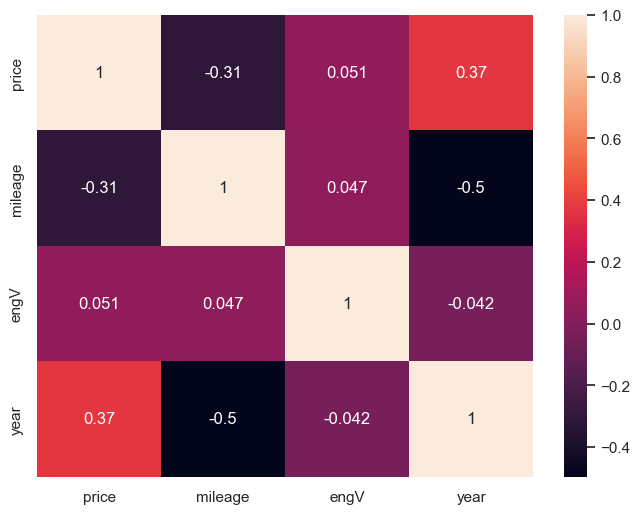

In [13]:
plt.subplots(figsize= (8,6))
sns.heatmap(carsales_data.corr(), annot= True)


<AxesSubplot: >

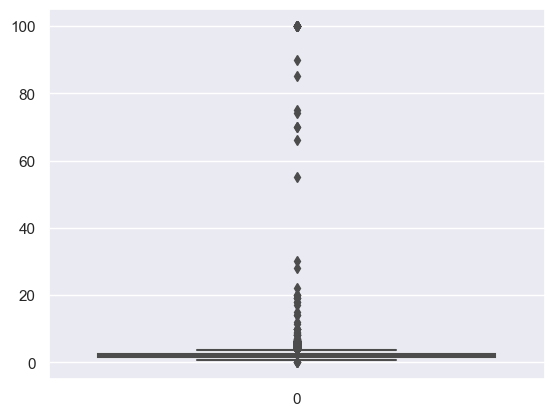

In [14]:
sns.boxplot(data= carsales_data.engV)

**Insights**

- Top 3 selling cars are Volkswagen, Mercedes-Benz , BMW
- Price and Year are highly coreleated
- engV column having mamy outliers

# Data Profiling

By pandas profiling, an interactive **HTML report** gets generated which contains all the information about the columns of the dataset, like the counts and type of each column.

In [15]:
from pandas_profiling import ProfileReport

C:\Users\karti\AppData\Local\Temp\ipykernel_26232\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [16]:
import pandas_profiling

In [17]:
car_profile = pandas_profiling.ProfileReport(carsales_data)

In [18]:
car_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
car_profile.to_file(output_file= "Car_Sales_data_before_preprocessing.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preprocessing

1. Check for Errors,duplicates and Null Values

2. Replace Null Values with appropriate values

3. Drop down features that are incomplete and are not too relevant for analysis

4. Create new features that can would help to improve prediction 



In [20]:
carsales_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [21]:
carsales_data.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [22]:
car1 = carsales_data.isnull().sum()
car2 = (carsales_data.isnull().sum()/len(carsales_data)) *100
car_concat = pd.concat([car1, car2], axis=1, keys=['Total', '%'])
print(car_concat)




              Total         %
car               0  0.000000
price             0  0.000000
body              0  0.000000
mileage           0  0.000000
engV            434  4.532164
engType           0  0.000000
registration      0  0.000000
year              0  0.000000
model             0  0.000000
drive           511  5.336257


**Duplicate values**

In [23]:
carsales_data.duplicated(subset= None, keep= 'first').sum()

113

In [24]:
carsales_data.loc[carsales_data.duplicated(subset= None, keep= 'first'),:]

,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9156,Volkswagen,15700.0,sedan,110,1.8,Petrol,yes,2011,Passat B7,front
9163,Mercedes-Benz,20500.0,sedan,222,5.5,Petrol,yes,2006,S 500,rear
9164,VAZ,3900.0,hatch,121,1.4,Petrol,yes,2008,1119,front
9169,Hyundai,12900.0,crossover,49,2.7,Petrol,yes,2008,Tucson,full


In [25]:
carsales_data.drop_duplicates(inplace=True)

In [26]:
carsales_data.duplicated(subset= None, keep= 'first').sum()

0

**Filling Null values**

In [27]:
b = carsales_data.drive.mode()
b

0    front
Name: drive, dtype: object

In [28]:
carsales_data['drive'] = carsales_data['drive'].fillna('front')

In [29]:
carsales_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive             0
dtype: int64

In [30]:
carsales_data.duplicated().sum()

0

In [31]:
carsales_data.groupby(['car', 'body'])['engV'].head(10)

0        2.5
1        1.8
2        5.5
3        1.8
4        NaN
        ... 
9499     3.7
9501     1.2
9508    19.0
9539     1.5
9566     NaN
Name: engV, Length: 1720, dtype: float64

In [32]:
carsales_data['engV'] = carsales_data.groupby(['car', 'body'])['engV'].transform(lambda x: x.fillna(x.median()))

c:\Users\karti\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\karti\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\karti\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\karti\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\karti\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\k

In [33]:
carsales_data.isnull().sum()

car              0
price            0
body             0
mileage          0
engV            10
engType          0
registration     0
year             0
model            0
drive            0
dtype: int64

In [34]:
carsales_data[carsales_data.engV.isnull()]

,car,price,body,mileage,engV,engType,registration,year,model,drive
319,Tesla,58000.0,hatch,52,NaN,Other,yes,2013,Model S,front
1437,Tesla,178500.0,crossover,0,NaN,Other,yes,2016,Model X,full
2486,Tesla,185000.0,crossover,1,NaN,Other,yes,2016,Model X,full
5084,GAZ,0.0,crossover,1,NaN,Petrol,yes,1963,69,full
6773,UAZ,3000.0,other,1,NaN,Other,yes,1985,3303,full
8569,Tesla,176900.0,crossover,0,NaN,Other,yes,2016,Model X,full
8824,Fisker,0.0,other,100,NaN,Other,yes,2001,Karma,front
8905,Changan,6028.0,crossover,101,NaN,Other,yes,2005,Ideal,front
9360,Barkas,5500.0,van,80,NaN,Petrol,yes,2015,B1000,front
9566,UAZ,850.0,van,255,NaN,Other,yes,1981,3962,front


In [35]:
carsales_data.isnull().sum()

car              0
price            0
body             0
mileage          0
engV            10
engType          0
registration     0
year             0
model            0
drive            0
dtype: int64

In [36]:
carsales_data.dropna(subset= ['engV'], inplace= True)
carsales_data.dropna(subset= ['drive'], inplace= True)

In [37]:
carsales_data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [38]:
#droping entries which have car price <=0

carsales_data = carsales_data.drop(carsales_data[carsales_data['price'] <=0].index)

In [39]:
carsales_data.groupby(['price']).head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.3,Other,yes,2013,E-Class,front
...,...,...,...,...,...,...,...,...,...,...
9550,BMW,44800.0,sedan,63,4.4,Petrol,yes,2012,750,rear
9551,Opel,10450.0,van,98,2.0,Diesel,yes,2013,Vivaro ����.,front
9555,Mercedes-Benz,2499.0,hatch,201,1.7,Diesel,no,2001,A 170,front
9567,Jeep,13990.0,crossover,210,3.0,Diesel,yes,2006,Grand Cherokee,full


In [40]:
carsales_data.price[carsales_data.price == 0].count()

0

In [41]:
carsales_data.mileage[carsales_data.mileage == 0].count()

281

In [42]:
t = carsales_data.mileage.median()
t

130.0

In [43]:
#replacing 0 value with the median 
carsales_data.mileage  = carsales_data.mileage.replace(0,t)

In [44]:
carsales_data.mileage[carsales_data.mileage == 0].count()

0

In [45]:
#creating profile report after the data is cleaned
car_profile2 = pandas_profiling.ProfileReport(carsales_data)
car_profile2.to_file(output_file= "Car_Sales_data_after_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
carsales_data.duplicated().sum()

0

# Questions

**1. Which types of cars are sold maximum?**

In [47]:
carsales_data.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.3,Other,yes,2013,E-Class,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [48]:
carsales_data.body.value_counts()

sedan        3564
crossover    1925
hatch        1231
van           996
other         802
vagon         697
Name: body, dtype: int64

Text(0.5, 1.0, 'Max car sold')

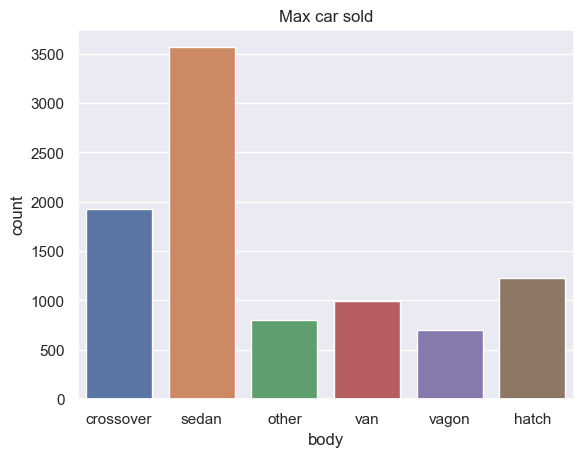

In [49]:
sns.countplot(data= carsales_data, x='body')
plt.title('Max car sold')

**Insights**

- *Sedan* is sold maximum
- vagon is least sold

**2. What is co-relation between price and mileage?**

<AxesSubplot: xlabel='mileage', ylabel='price'>

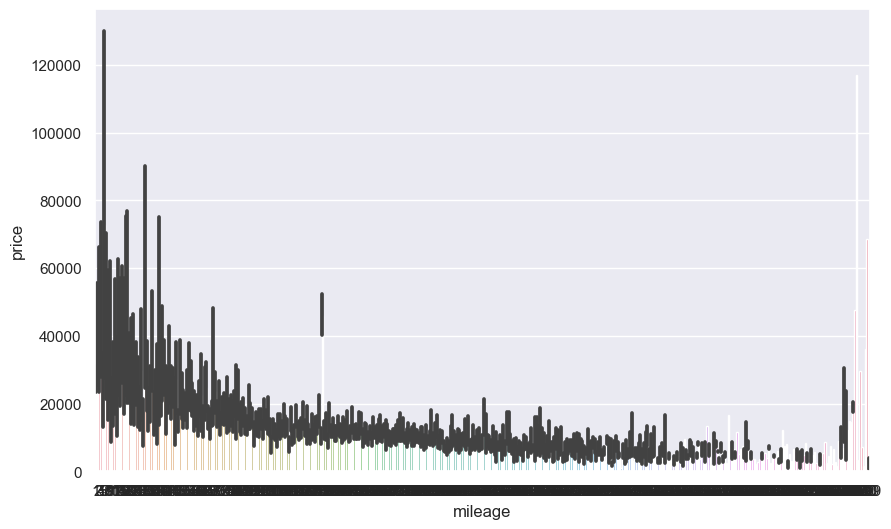

In [50]:
plt.figure(figsize=( 10, 6))
sns.barplot(data= carsales_data, x= 'mileage', y= 'price')

<AxesSubplot: xlabel='mileage', ylabel='price'>

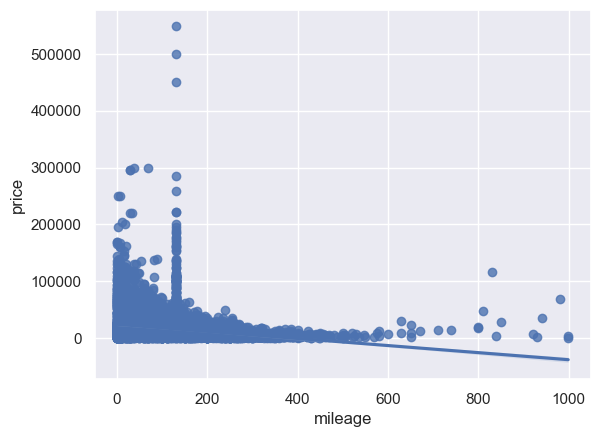

In [51]:
sns.regplot(data= carsales_data, x= 'mileage', y= 'price')

**Insights**

- Max cars lies between 1500000 price and 0-400 miliage
- There are some outliers in this data

**3. How many cars are registered?**

In [52]:
carsales_data.registration.value_counts()

yes    8661
no      554
Name: registration, dtype: int64

Text(0.5, 1.0, 'Car Registration status')

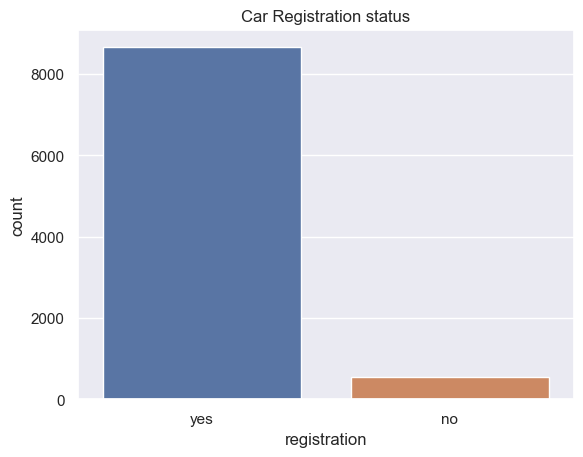

In [53]:
sns.countplot(data= carsales_data, x= 'registration')
plt.title('Car Registration status')

**Insights**

- 8661 cars are registered out of 9215 cars

**4. Price distribution between registered and non registered cars**

<AxesSubplot: xlabel='registration', ylabel='price'>

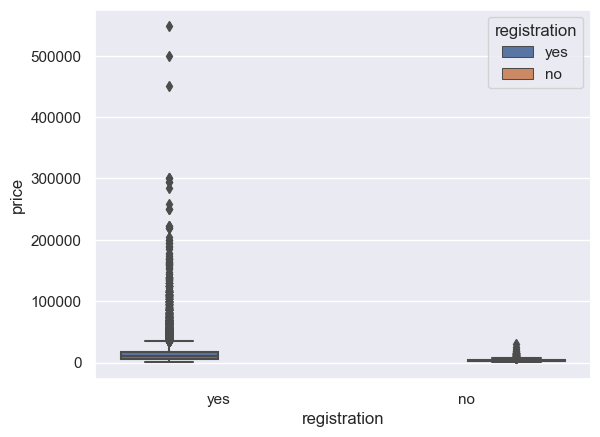

In [54]:
sns.boxplot(data= carsales_data, x= 'registration', y= 'price', hue= 'registration')

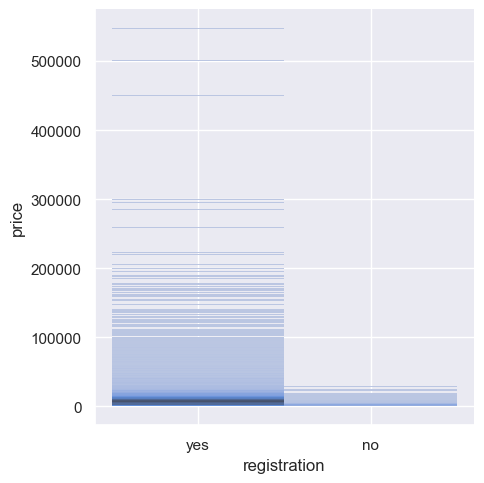

In [55]:
sns.displot(data= carsales_data, x= 'registration', y= 'price')

**Insights**

- Non registered cars have low price
- Maximum registered cars lie between 0-300000

**5. What is the car price distribution based on engin value?**

In [58]:
carsales_data.engV.value_counts()

2.00     1548
1.60     1250
1.50      729
3.00      627
1.80      597
         ... 
1.78        1
1.36        1
55.00       1
1.59        1
74.00       1
Name: engV, Length: 119, dtype: int64

<AxesSubplot: xlabel='engV', ylabel='price'>

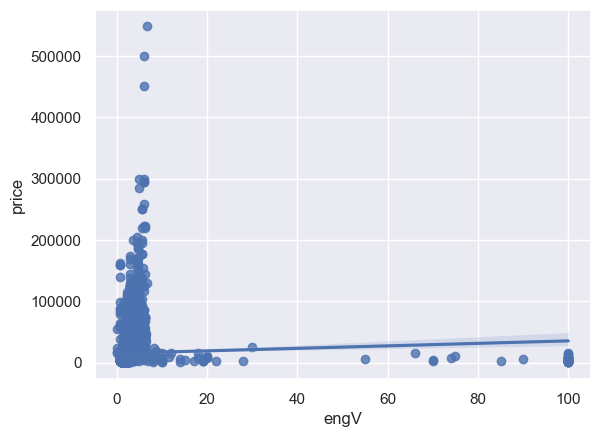

In [59]:
sns.regplot(data= carsales_data, x= 'engV', y= 'price')

<AxesSubplot: xlabel='engV', ylabel='price'>

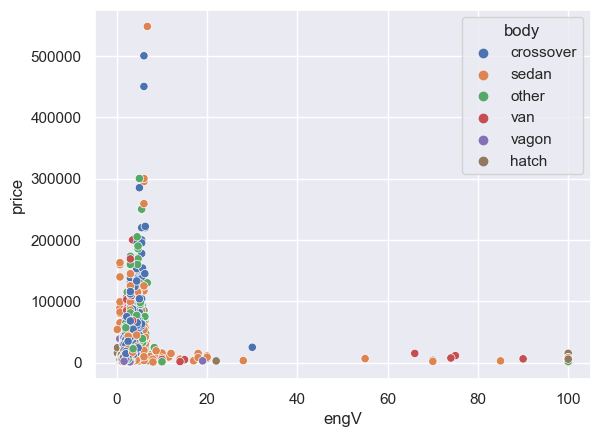

In [61]:
sns.scatterplot(data= carsales_data, x= 'engV', y= 'price', hue='body')

**Insights**
- There are some outliers in the data
- Maximun cars soled were having engine value between 0-1.5 and they lie below 150000


**6. Which engine type of cars users prefered maximun?**

In [70]:
carsales_data.engType.value_counts(ascending= False)

Petrol    4259
Diesel    2821
Gas       1692
Other      443
Name: engType, dtype: int64

<AxesSubplot: xlabel='engType', ylabel='count'>

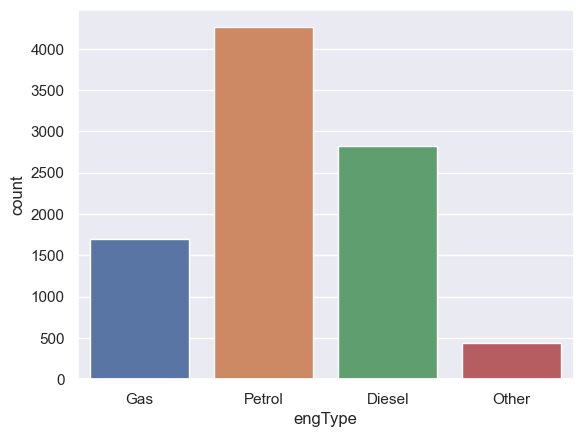

In [74]:
sns.countplot(data= carsales_data, x= 'engType')

<AxesSubplot: xlabel='engType', ylabel='count'>

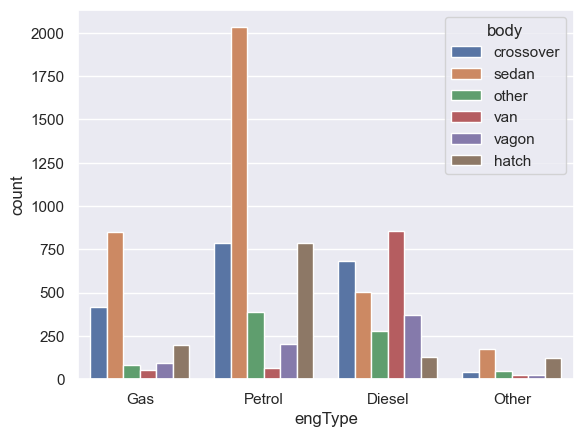

In [75]:
sns.countplot(data= carsales_data, x='engType', hue='body')

**Insights**

- Users prefered *Petrol* type engines more 
- In petrol type engine Sedan body cars had maximum sales

**6. Establish corealtion between all features using heatmap**

In [82]:
carsales_corr = carsales_data.corr()
print(carsales_corr)

            price   mileage      engV      year
price    1.000000 -0.256693  0.051242  0.391745
mileage -0.256693  1.000000  0.055425 -0.451794
engV     0.051242  0.055425  1.000000 -0.047734
year     0.391745 -0.451794 -0.047734  1.000000


C:\Users\karti\AppData\Local\Temp\ipykernel_26232\1981126527.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  carsales_corr = carsales_data.corr()


Text(0.5, 1.0, 'Corelation between features')

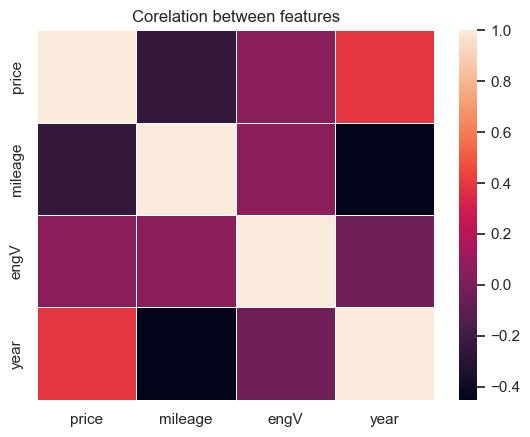

In [81]:
sns.heatmap(data= carsales_corr, linewidths= .5)
plt.title('Corelation between features')

**Insights**

- *Year* and *price* have maximum *positive* corelation
- year and milage have negative corealtion
- Engine value has postive corelation with price and mileage

**7. Distribution of price**

<AxesSubplot: ylabel='price'>

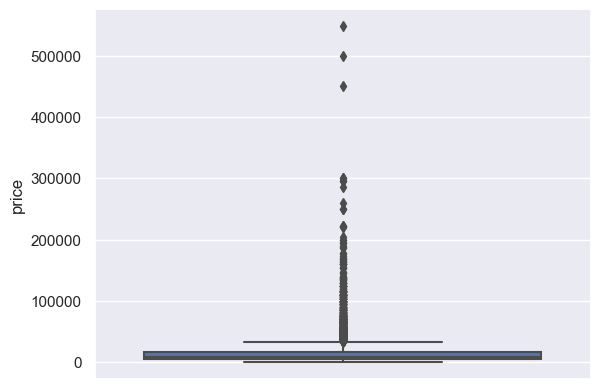

In [86]:
sns.boxplot(data= carsales_data, y= 'price')

Text(0.5, 1.0, 'Price Distribution')

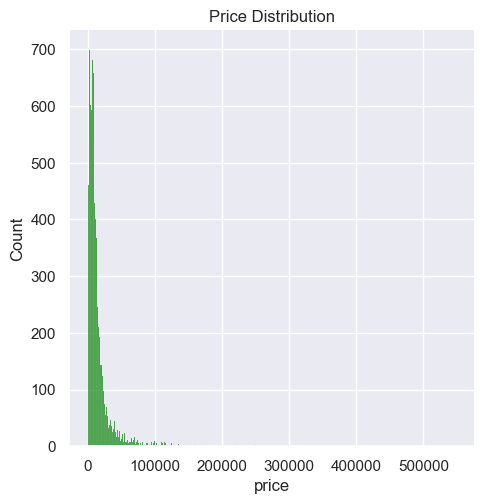

In [93]:
sns.displot(data = carsales_data,x= 'price', color= 'green')
plt.title('Price Distribution')

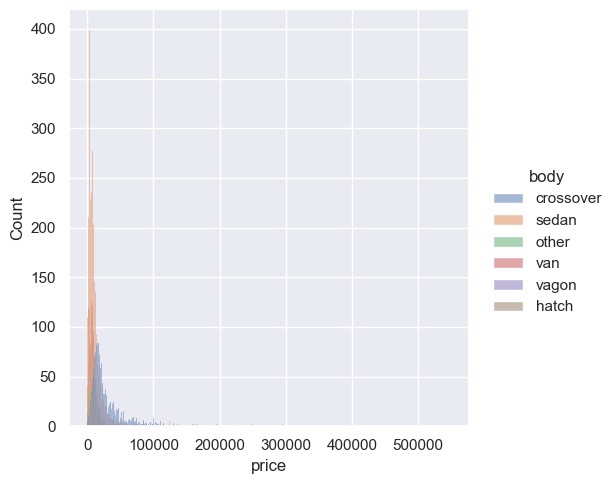

In [94]:
sns.displot(data= carsales_data, x='price', hue= 'body')

**Insights**

- Maximum cars are sold between 0-80000

<AxesSubplot: xlabel='engV', ylabel='mileage'>

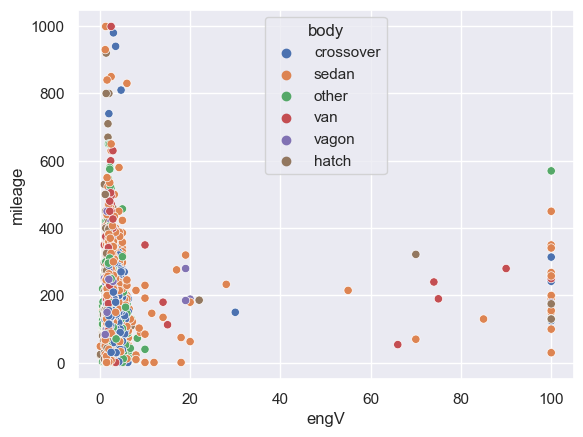

In [98]:
sns.scatterplot(data= carsales_data, x='engV', y= 'mileage', hue= 'body')

# Conclusion

- Sedan are maximum sold with petrol engines
- Maximun cars sales are between 0-80000
- Registered car have good sales
- Lower engv between 0-1.5 are having high mileage
- Lower engv cars have high sales